In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
import numpy as np


In [8]:
df_bennin = pd.read_csv(r"C:\Users\filimon.hailemariam\Downloads\Week_0\data\benin_clean.csv")

df_togo = pd.read_csv(r"C:\Users\filimon.hailemariam\Downloads\Week_0\data\togo-dapaong_qc_clean.csv")
df_sierraleone= pd.read_csv(r"C:\Users\filimon.hailemariam\Downloads\Week_0\data\sierraleone-bumbuna_clean.csv")

In [ ]:
# Add Country Labels
df_bennin["Country"] = "Benin"
df_togo["Country"] = "Togo"
df_sierraleone["Country"] = "Sierra Leone"
#  Combine DataFrames
df_all = pd.concat([df_bennin, df_togo, df_sierraleone], ignore_index=True)

#  Target Metrics
metrics = ['GHI', 'DNI', 'DHI']

In [10]:

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 110

# Label each frame
df_bennin["country"] = "Benin"
df_togo["country"] = "Togo"
df_sierraleone["country"] = "Sierra Leone"

# Combine
df_all = pd.concat([df_bennin, df_togo, df_sierraleone], ignore_index=True)

# Target metrics
metrics = ["GHI", "DNI", "DHI"]
present = [m for m in metrics if m in df_all.columns]
assert len(present) > 0, f"No target metric columns found in {df_all.columns.tolist()}"

# Keep only what we need and coerce to numeric
data = df_all[present + ["country"]].copy()
for c in present:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# Drop rows where all target metrics are NaN
data = data.dropna(subset=present, how="all")

print("Rows by country:", data["country"].value_counts().to_dict())
data.head()


Rows by country: {'Benin': 517707, 'Togo': 516343, 'Sierra Leone': 509053}


,GHI,DNI,DHI,country
0,0.0,0.0,0.0,Benin
1,0.0,0.0,0.0,Benin
2,0.0,0.0,0.0,Benin
3,0.0,0.0,0.0,Benin
4,0.0,0.0,0.0,Benin


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_18792\355172903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="country", y=m, ax=ax, palette="Set2")
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_18792\355172903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="country", y=m, ax=ax, palette="Set2")
C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_18792\355172903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="country", y=m, ax=ax, palette="Set2")


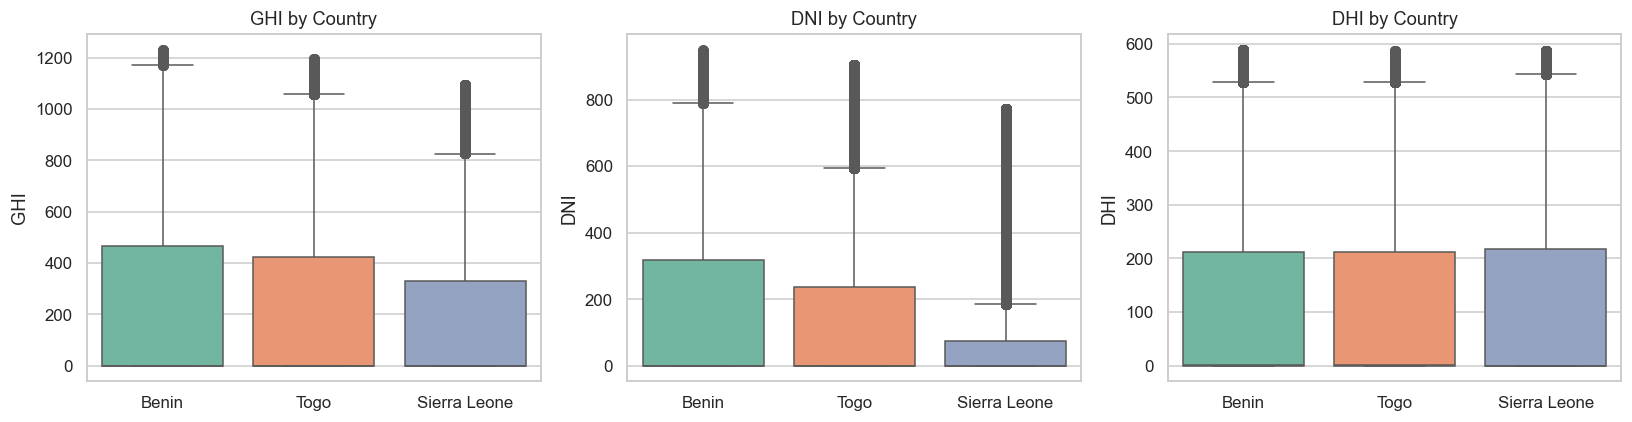

In [11]:
n = len(present)
fig, axes = plt.subplots(1, n, figsize=(5*n, 4), sharey=False)

for i, m in enumerate(present):
    ax = axes[i] if n > 1 else axes
    sns.boxplot(data=data, x="country", y=m, ax=ax, palette="Set2")
    ax.set_title(f"{m} by Country")
    ax.set_xlabel("")
    ax.set_ylabel(m)

plt.tight_layout()
plt.show()


In [13]:
# --- Summary Table: Mean, Median, and Standard Deviation of Solar Metrics ---

# Select the key irradiance metrics
metrics = ['GHI', 'DNI', 'DHI']

# Group by country and calculate descriptive stats
summary = (
    df_all.groupby("Country")[metrics]
          .agg(['mean', 'median', 'std'])
          .round(2)
)

# Display summary
display(summary)

# Optional: flatten columns for easier export
summary_flat = summary.copy()
summary_flat.columns = [f"{metric}_{stat}" for metric, stat in summary_flat.columns]
summary_flat.reset_index(inplace=True)

display(summary_flat)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         237.48    0.6  327.17  167.14    0.0  261.94  113.17    0.4   
Sierra Leone  187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   
Togo          225.03    0.5  316.45  147.97    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         151.66  
Sierra Leone  151.44  
Togo          151.57

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,237.48,0.6,327.17,167.14,0.0,261.94,113.17,0.4,151.66
1,Sierra Leone,187.21,0.0,277.02,104.21,0.0,200.82,110.50,0.0,151.44
2,Togo,225.03,0.5,316.45,147.97,0.0,247.68,112.78,1.5,151.57


C:\Users\filimon.hailemariam\AppData\Local\Temp\ipykernel_18792\579552770.py:25: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)                      # stack the metric level


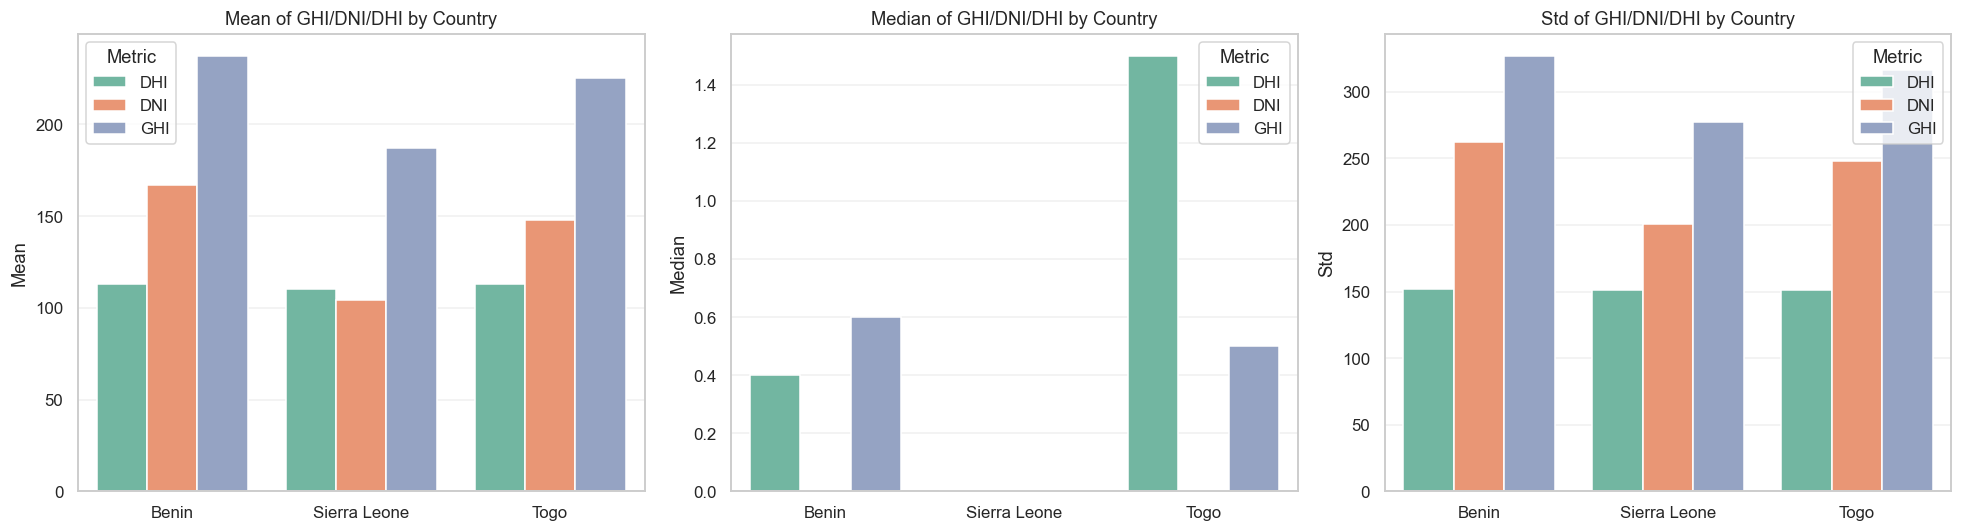

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,237.48,0.6,327.17,167.14,0.0,261.94,113.17,0.4,151.66
1,Sierra Leone,187.21,0.0,277.02,104.21,0.0,200.82,110.50,0.0,151.44
2,Togo,225.03,0.5,316.45,147.97,0.0,247.68,112.78,1.5,151.57


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 110

# Ensure numeric and keep only needed cols
metrics = ["GHI", "DNI", "DHI"]
for m in metrics:
    if m in df_all.columns:
        df_all[m] = pd.to_numeric(df_all[m], errors="coerce")
df_all = df_all.dropna(subset=[c for c in metrics if c in df_all.columns], how="all")

# 1) Build summary table (mean/median/std)
summary_stats = (
    df_all.groupby("Country")[metrics]
          .agg(["mean", "median", "std"])
          .round(2)
)

# 2) Tidy it for plotting: one row per Country×Metric with columns mean/median/std
summary_tidy = (
    summary_stats
      .stack(level=0)                      # stack the metric level
      .rename_axis(index=["Country","Metric"])
      .reset_index()                       # columns: Country, Metric, mean, median, std
)

# 3) Make three grouped bar charts: one per stat, hue by metric
stats_to_plot = ["mean", "median", "std"]
fig, axes = plt.subplots(1, len(stats_to_plot), figsize=(18, 5), sharey=False)

for ax, stat in zip(axes, stats_to_plot):
    sns.barplot(
        data=summary_tidy,
        x="Country", y=stat, hue="Metric",
        palette="Set2", ax=ax
    )
    ax.set_title(f"{stat.capitalize()} of GHI/DNI/DHI by Country")
    ax.set_xlabel("")
    ax.set_ylabel(stat.capitalize())
    ax.grid(True, axis="y", alpha=0.3)
    ax.legend(title="Metric")

plt.tight_layout()
plt.show()

# (Optional) If you still want a flat exportable table:
summary_flat = summary_stats.copy()
summary_flat.columns = [f"{metric}_{stat}" for metric, stat in summary_flat.columns]
display(summary_flat.reset_index())


In [12]:
# --- Statistical Testing on GHI across Countries (ANOVA + Kruskal–Wallis) ---
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, kruskal, levene, normaltest

# 1) Prep: ensure we have the right columns and clean NaNs
assert {"Country", "GHI"}.issubset(df_all.columns), "df_all must have 'Country' and 'GHI' columns."
tmp = df_all[["Country", "GHI"]].copy()
tmp["GHI"] = pd.to_numeric(tmp["GHI"], errors="coerce")
tmp = tmp.dropna(subset=["GHI"])

# 2) Build groups
groups = []
labels = []
for name, g in tmp.groupby("Country"):
    vals = g["GHI"].dropna().values
    if len(vals) > 1:  # need at least 2 points to contribute
        groups.append(vals)
        labels.append(name)

print("Groups and sizes:", {lab: len(arr) for lab, arr in zip(labels, groups)})
if len(groups) < 2:
    raise ValueError("Need at least two non-empty groups for a between-country test.")

# 3) Assumption checks for ANOVA
#    - Normality per group (D’Agostino K^2 via normaltest; requires n>=8; otherwise we skip)
normality = {}
for lab, arr in zip(labels, groups):
    if len(arr) >= 8:
        stat, p = normaltest(arr)
        normality[lab] = p
    else:
        normality[lab] = np.nan  # not enough data to test

#    - Homogeneity of variances (Levene’s)
lev_stat, lev_p = levene(*groups, center="median")

# 4) Main tests
#    ANOVA (parametric)
anova_f, anova_p = f_oneway(*groups)

#    Kruskal–Wallis (nonparametric, robust to non-normality)
kw_h, kw_p = kruskal(*groups)

# 5) Pretty print results
print("\n=== Assumption Checks ===")
for lab, p in normality.items():
    if np.isnan(p):
        print(f"Normality [{lab}]: n<8 → skipped")
    else:
        print(f"Normality [{lab}]: p={p:.4g}  ({'PASS' if p>=0.05 else 'FAIL'})")
print(f"Levene equal variances: p={lev_p:.4g}  ({'PASS' if lev_p>=0.05 else 'FAIL'})")

print("\n=== Main Tests on GHI by Country ===")
print(f"One-way ANOVA: F={anova_f:.3f}, p={anova_p:.4g}")
print(f"Kruskal–Wallis: H={kw_h:.3f}, p={kw_p:.4g}")

# 6) Quick interpretation hints
def verdict(p): return "SIGNIFICANT (p<0.05)" if p < 0.05 else "not significant (p≥0.05)"
print("\nInterpretation:")
print(f"- ANOVA says differences are {verdict(anova_p)}.")
print(f"- Kruskal–Wallis says differences are {verdict(kw_p)}.")
print("- If normality/variance checks FAIL, rely more on Kruskal–Wallis.")


Groups and sizes: {'Benin': 517707, 'Sierra Leone': 509053, 'Togo': 516343}

=== Assumption Checks ===
Normality [Benin]: p=0  (FAIL)
Normality [Sierra Leone]: p=0  (FAIL)
Normality [Togo]: p=0  (FAIL)
Levene equal variances: p=0  (FAIL)

=== Main Tests on GHI by Country ===
One-way ANOVA: F=3705.220, p=0
Kruskal–Wallis: H=2743.460, p=0

Interpretation:
- ANOVA says differences are SIGNIFICANT (p<0.05).
- Kruskal–Wallis says differences are SIGNIFICANT (p<0.05).
- If normality/variance checks FAIL, rely more on Kruskal–Wallis.


### 🔍 Key Observations — Cross-Country Solar Metric Comparison

- **Benin** shows the **highest mean and median GHI/DNI**, indicating the strongest overall solar potential among the three countries. This makes it the most promising site for high-yield solar projects.  
- **Togo** demonstrates **moderate irradiance values** with lower variability (std), suggesting stable weather conditions and predictable energy generation potential.  
- **Sierra Leone** records the **lowest average GHI and DNI**, but maintains comparable DHI levels, reflecting a higher proportion of **diffuse solar radiation** due to more frequent cloud cover or humidity.

**Decision Insight:**  
Based on these findings, **Benin** should be prioritized for solar farm deployment, followed by **Togo**. **Sierra Leone** may require systems optimized for diffuse radiation (e.g., fixed-tilt panels or hybrid setups) to maximize efficiency.
